# WMPY EXTLIB

In [1]:
%pylab inline
import sys,os
import numpy as np
import scipy.signal as ss

sys.path.insert(0, os.path.join(sys.path[0], '..'))
import extlib as xl

Populating the interactive namespace from numpy and matplotlib


## hilbert_kernel

In [2]:
help(xl.hilbert_kernel)

Help on function hilbert_kernel in module extlib:

hilbert_kernel(N, band=0.95)
    Generate a Hilbert Transform kernel.
    
    Calculate a 2*N+1 length complex kernel to compute a Hilbert Transform as
    per:
            Reilly etal, 1994: Analytic signal generation - tips and tricks
    Convolving a signal with the kernel will give a complex output which approximates the 
    analytic signal. The real part of the ouput will be a bandpass filtered version of the
    input and the imaginary part will be a bandpass filtered Hilbert transform of the 
    input.
    
    Args:
    N:      the half-length of the transform kernel.
    band:   optional, specifies the bandwidth of the transform in normalised frequency 
            where 1.0 is the nyquist. Default and recommended maximum value is 0.95.
            Higher values do not fully attenuate negative frequencies.
    
    Returns:
        A 2*N+1 long complex array with the kernel.



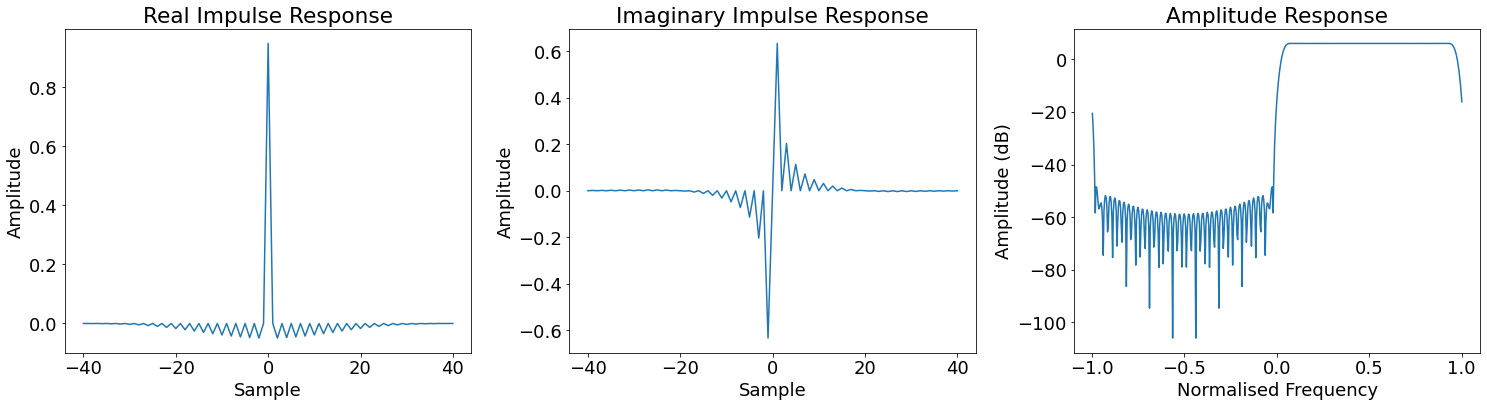

In [3]:
N = 40
Np = 2*N+1

kernel = xl.hilbert_kernel(N,0.95)
Om, Hf = ss.freqz(kernel, whole=True)
Om = (1-Om/np.pi)

matplotlib.rcParams.update({'font.size': 18})
fig,axes = plt.subplots( 1,3, figsize=(21,6) )
axes[0].plot(np.linspace(-N,N,Np), np.real(kernel))
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Real Impulse Response')
axes[1].plot(np.linspace(-N,N,Np), np.imag(kernel))
axes[1].set_xlabel('Sample')
axes[1].set_ylabel('Amplitude')
axes[1].set_title('Imaginary Impulse Response')
axes[2].plot(Om, 20*np.log10(np.abs(Hf)))
axes[2].set_xlabel('Normalised Frequency')
axes[2].set_ylabel('Amplitude (dB)')
axes[2].set_title('Amplitude Response')

fig.tight_layout()

## lowpass_kernel

In [4]:
help(xl.lowpass_kernel)

Help on function lowpass_kernel in module extlib:

lowpass_kernel(N, freq=0.5)
    Generate a Lowpass filter kernel.
    
    Calculate a 2*N+1 length Hamming filter kernel
    
    Args:
    N:      the half-length of the filter kernel.
    freq:   optional, cutoff frequency in normalised frequency
            where 1.0 is the nyquist. Default is 0.5.
    
    Returns:
            A 2*N+1 long array with the kernel.



Text(0.5, 1.0, 'Amplitude Response')

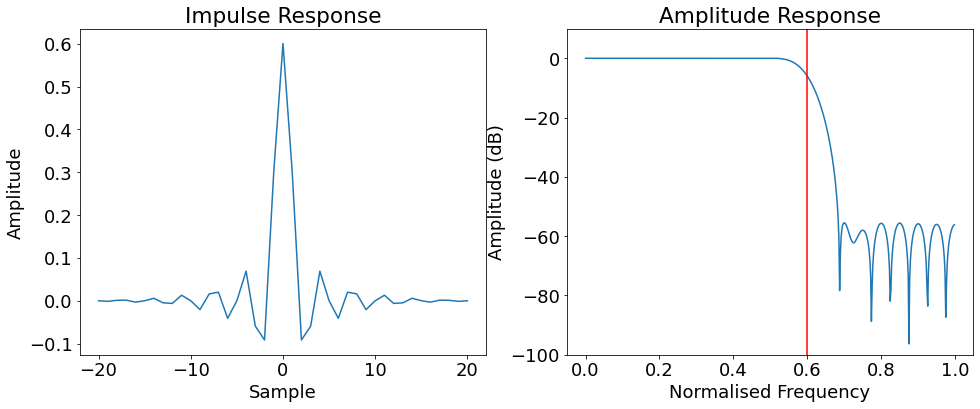

In [5]:
N = 20
Np = 2*N+1
cutoff = 0.6
kernel = xl.lowpass_kernel(N, cutoff)

matplotlib.rcParams.update({'font.size': 18})
fig,axes = plt.subplots( 1,2, figsize=(16,6) )
axes[0].plot(np.linspace(-N,N,Np), kernel)
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Impulse Response')

Om, Hf = ss.freqz(kernel)
Om = (Om/np.pi)

axes[1].plot(Om, 20*np.log10(np.abs(Hf)))
axes[1].set_ylim(-100,10)
plt.vlines(x=cutoff, ymin=-100, ymax=10, color='r')
axes[1].set_xlabel('Normalised Frequency')
axes[1].set_ylabel('Amplitude (dB)')
axes[1].set_title('Amplitude Response')


## highpass kernel

In [6]:
help(xl.highpass_kernel)

Help on function highpass_kernel in module extlib:

highpass_kernel(N, freq=0.5)
    Generate a Highpass filter kernel.
    
    Calculate a 2*N+1 length Hamming filter kernel
    
    Args:
    N:      the half-length of the filter kernel.
    freq:   optional, cutoff frequency in normalised frequency
            where 1.0 is the nyquist. Default is 0.5.
    
    Returns:
            A 2*N+1 long array with the kernel.



Text(0.5, 1.0, 'Amplitude Response')

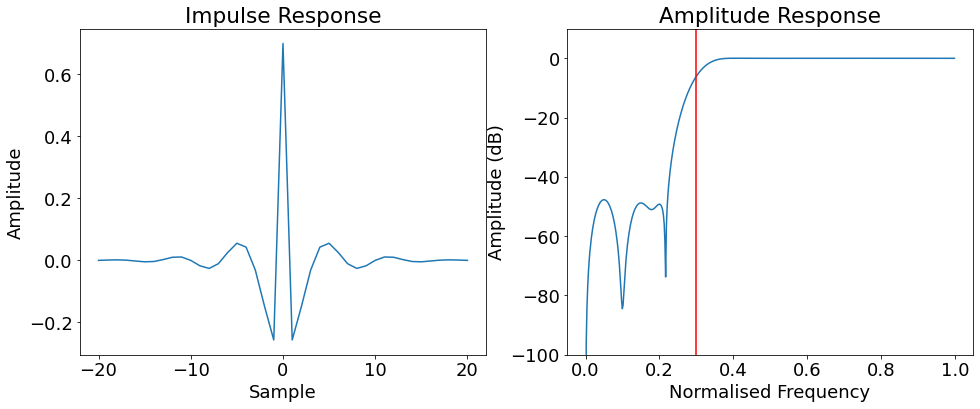

In [7]:
N = 20
Np = 2*N+1
cutoff = 0.3

kernel = xl.highpass_kernel(N, cutoff)

matplotlib.rcParams.update({'font.size': 18})
fig,axes = plt.subplots( 1,2, figsize=(16,6) )
axes[0].plot(np.linspace(-N,N,Np), np.real(kernel))
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Impulse Response')

Om, Hf = ss.freqz(kernel,whole=False)
Om = (Om/np.pi)

axes[1].plot(Om, 20*np.log10(np.abs(Hf)))
axes[1].set_ylim(-100,10)
plt.vlines(x=cutoff, ymin=-100, ymax=10, color='r')
axes[1].set_xlabel('Normalised Frequency')
axes[1].set_ylabel('Amplitude (dB)')
axes[1].set_title('Amplitude Response')

## bandreject kernel

In [8]:
help(xl.bandreject_kernel)

Help on function bandreject_kernel in module extlib:

bandreject_kernel(N, freq, halfwidth=0.1)
    Generate a Bandreject filter kernel.
    
    Calculate a 2*N+1 length Hamming filter kernel
    
    Args:
    N:      the half-length of the filter kernel.
    freq:   centre frequency of the reject band in normalised frequency
            where 1.0 is the nyquist.
    halfwidth:      aperture of the reject band - freq +/- halfwidth - default=0.1
    
    Returns:
            A 2*N+1 long array with the kernel.



Text(0.5, 1.0, 'Amplitude Response')

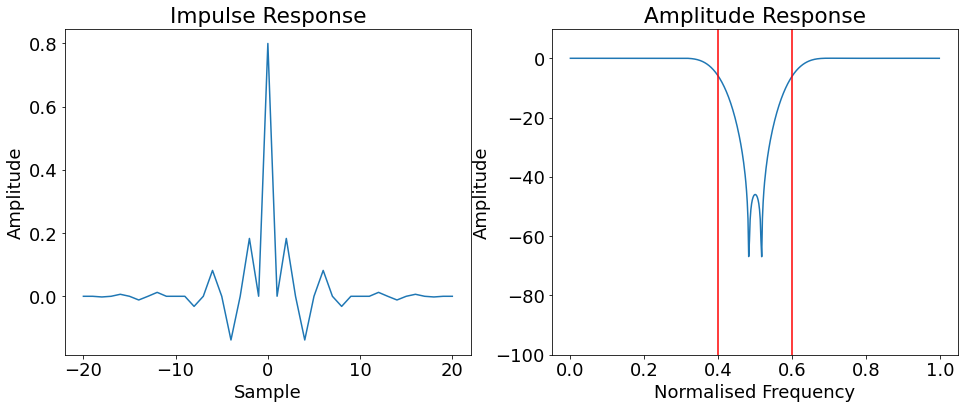

In [9]:
N = 20
Np = 2*N+1
centre = 0.5
hwidth = 0.1

kernel = xl.bandreject_kernel(N, centre, hwidth)

matplotlib.rcParams.update({'font.size': 18})
fig,axes = plt.subplots( 1,2, figsize=(16,6) )
axes[0].plot(np.linspace(-N,N,Np), np.real(kernel))
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Impulse Response')

Om, Hf = ss.freqz(kernel,whole=False)
Om = (Om/np.pi)

axes[1].plot(Om, 20*np.log10(np.abs(Hf)))
axes[1].set_ylim(-100,10)
plt.vlines(x=[centre-hwidth, centre+hwidth], ymin=-100, ymax=10, color='r')
axes[1].set_xlabel('Normalised Frequency')
axes[1].set_ylabel('Amplitude')
axes[1].set_title('Amplitude Response')

## bandpass kernel

In [10]:
help(xl.bandpass_kernel)

Help on function bandpass_kernel in module extlib:

bandpass_kernel(N, freq, halfwidth=0.1)
    Generate a Bandreject filter kernel.
    
    Calculate a 2*N+1 length Hamming filter kernel
    
    Args:
    N:      the half-length of the filter kernel.
    freq:   centre frequency of the pass band in normalised frequency
            where 1.0 is the nyquist.
    halfwidth:      aperture of the pass band - freq +/- halfwidth - default=0.1
    
    Returns:
            A 2*N+1 long array with the kernel.



Text(0.5, 1.0, 'Amplitude Response')

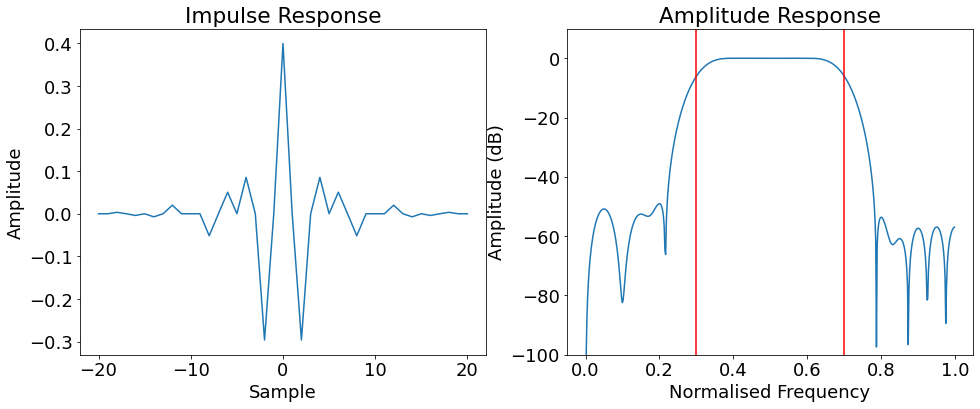

In [11]:
N = 20
Np = 2*N+1
centre = 0.5
hwidth = 0.2

kernel = xl.bandpass_kernel(N, centre, hwidth)

matplotlib.rcParams.update({'font.size': 18})
fig,axes = plt.subplots( 1,2, figsize=(16,6) )
axes[0].plot(np.linspace(-N,N,Np), np.real(kernel))
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Impulse Response')

Om, Hf = ss.freqz(kernel,whole=False)
Om = (Om/np.pi)

axes[1].plot(Om, 20*np.log10(np.abs(Hf)))
axes[1].set_ylim(-100,10)
plt.vlines(x=[centre-hwidth, centre+hwidth], ymin=-100, ymax=10, color='r')
axes[1].set_xlabel('Normalised Frequency')
axes[1].set_ylabel('Amplitude (dB)')
axes[1].set_title('Amplitude Response')